### Import libraries

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data
relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)
relationship_df

,source,target,value
0,France,Russia,12
1,Germany,Russia,21
2,Germany,Italy,26
3,Austria,Germany,11
4,Germany,Spain,3
...,...,...,...
82,Greece,Italy,2
83,Italy,Japan,6
84,Romania,Russia,6
85,India,Lebanon,2


In [3]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

### Graph visualization - Networkx

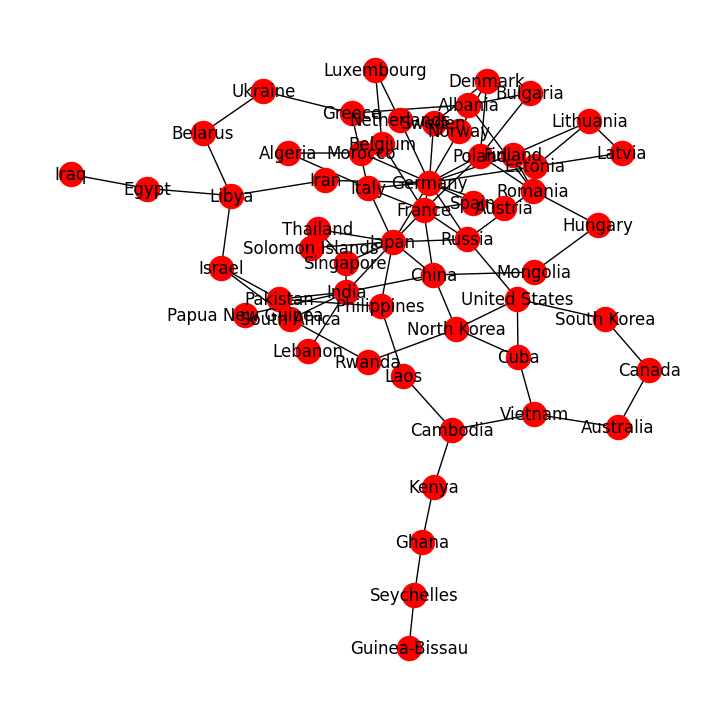

In [4]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show() 

In [5]:
h.savefig('networkx_plt_countries.png')

### Graph visualization - Pyvis (Static graph)

In [6]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("countries.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


Germany shows thick edges with Japan, Italy and Poland, and Japan with China.

### Community detection: Leiden algorithm

In [7]:
import igraph
import leidenalg

In [8]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'bayanpy', 'graph_tool', 'infomap', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'ASLPAw', 'pyclustering'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [9]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [11]:
new_com = coms.to_node_community_map()
new_com

defaultdict(list,
            {'France': [0],
             'Russia': [0],
             'Germany': [0],
             'Italy': [0],
             'Austria': [0],
             'Spain': [0],
             'Poland': [0],
             'Denmark': [0],
             'Norway': [0],
             'Sweden': [0],
             'Netherlands': [0],
             'Luxembourg': [0],
             'Belgium': [0],
             'Morocco': [0],
             'Algeria': [0],
             'Japan': [1],
             'China': [1],
             'Thailand': [1],
             'Singapore': [1],
             'Philippines': [1],
             'Solomon Islands': [1],
             'India': [1],
             'Pakistan': [1],
             'Israel': [1],
             'South Africa': [1],
             'Papua New Guinea': [1],
             'Laos': [1],
             'Lebanon': [1],
             'Albania': [2],
             'Greece': [2],
             'Ukraine': [2],
             'Belarus': [2],
             'Libya': [2],
          

The Leiden algorithm looks for the most favorable separation of the characters and assigns a number to the community where it thinks the characters belong. 

In [12]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}
dict_com

{'France': 0,
 'Russia': 0,
 'Germany': 0,
 'Italy': 0,
 'Austria': 0,
 'Spain': 0,
 'Poland': 0,
 'Denmark': 0,
 'Norway': 0,
 'Sweden': 0,
 'Netherlands': 0,
 'Luxembourg': 0,
 'Belgium': 0,
 'Morocco': 0,
 'Algeria': 0,
 'Japan': 1,
 'China': 1,
 'Thailand': 1,
 'Singapore': 1,
 'Philippines': 1,
 'Solomon Islands': 1,
 'India': 1,
 'Pakistan': 1,
 'Israel': 1,
 'South Africa': 1,
 'Papua New Guinea': 1,
 'Laos': 1,
 'Lebanon': 1,
 'Albania': 2,
 'Greece': 2,
 'Ukraine': 2,
 'Belarus': 2,
 'Libya': 2,
 'Egypt': 2,
 'Iraq': 2,
 'Iran': 2,
 'Bulgaria': 2,
 'North Korea': 3,
 'Cuba': 3,
 'United States': 3,
 'South Korea': 3,
 'Canada': 3,
 'Australia': 3,
 'Vietnam': 3,
 'Rwanda': 3,
 'Estonia': 4,
 'Latvia': 4,
 'Lithuania': 4,
 'Finland': 4,
 'Romania': 4,
 'Hungary': 4,
 'Mongolia': 4,
 'Cambodia': 5,
 'Kenya': 5,
 'Ghana': 5,
 'Seychelles': 5,
 'Guinea-Bissau': 5}

Once the result has been stored in the dictionary, we go ahead and remake the dynamic network graph to comb through the communities and add them to the graph:

In [13]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("alice_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### The most important characters in Alice in Wonderland

#### Degree centrality

In [14]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.14285714285714285,
 'Russia': 0.08928571428571427,
 'Germany': 0.25,
 'Italy': 0.08928571428571427,
 'Austria': 0.017857142857142856,
 'Spain': 0.03571428571428571,
 'Poland': 0.08928571428571427,
 'Estonia': 0.05357142857142857,
 'Latvia': 0.03571428571428571,
 'Lithuania': 0.05357142857142857,
 'Finland': 0.05357142857142857,
 'Denmark': 0.05357142857142857,
 'Norway': 0.03571428571428571,
 'Sweden': 0.03571428571428571,
 'Netherlands': 0.03571428571428571,
 'Luxembourg': 0.03571428571428571,
 'Belgium': 0.03571428571428571,
 'Albania': 0.05357142857142857,
 'Greece': 0.05357142857142857,
 'Ukraine': 0.03571428571428571,
 'Belarus': 0.03571428571428571,
 'Libya': 0.07142857142857142,
 'Egypt': 0.03571428571428571,
 'Iraq': 0.017857142857142856,
 'Japan': 0.17857142857142855,
 'Morocco': 0.03571428571428571,
 'Algeria': 0.03571428571428571,
 'China': 0.08928571428571427,
 'Thailand': 0.03571428571428571,
 'Singapore': 0.05357142857142857,
 'Philippines': 0.053571428571428

In [15]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [16]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

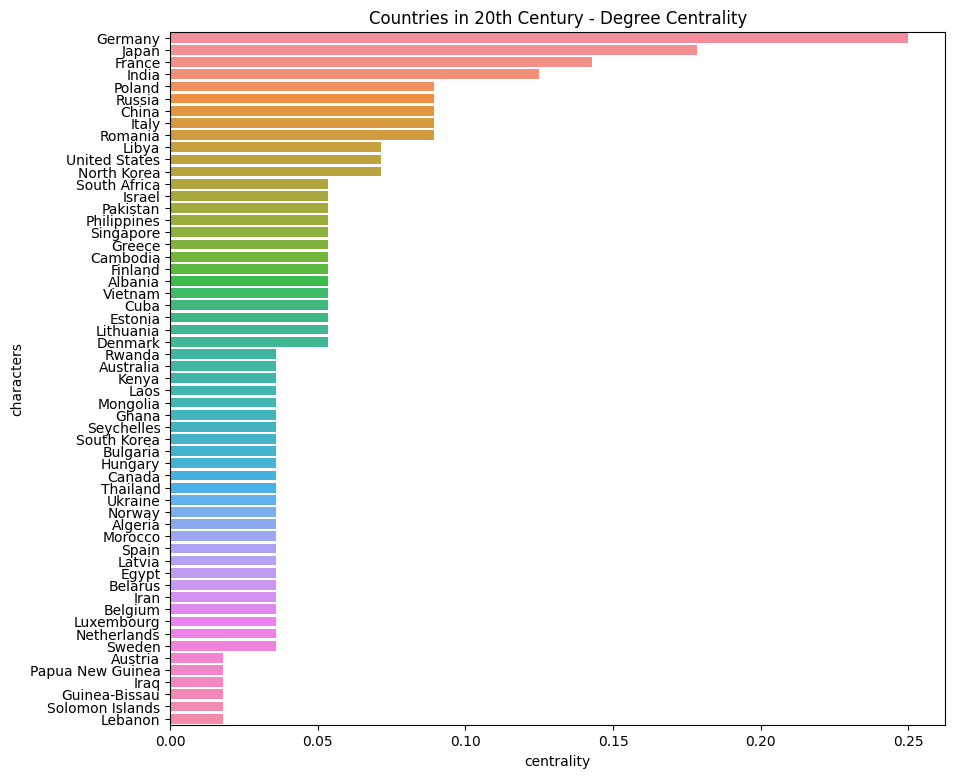

In [20]:
# Plot the degree centrality

plt.figure(figsize = (10, 9))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Countries in 20th Century - Degree Centrality")

The bar chart shows that Germany is the country with the highest degree of centrality. In other words, Germany has the most connections to other countriesin 20th century. 
Next is Japan, and then France.

Lebanon, solomon Islands, Guinea, and Iraq have the fewest connections.

#### Closeness centrality

In [21]:
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [22]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

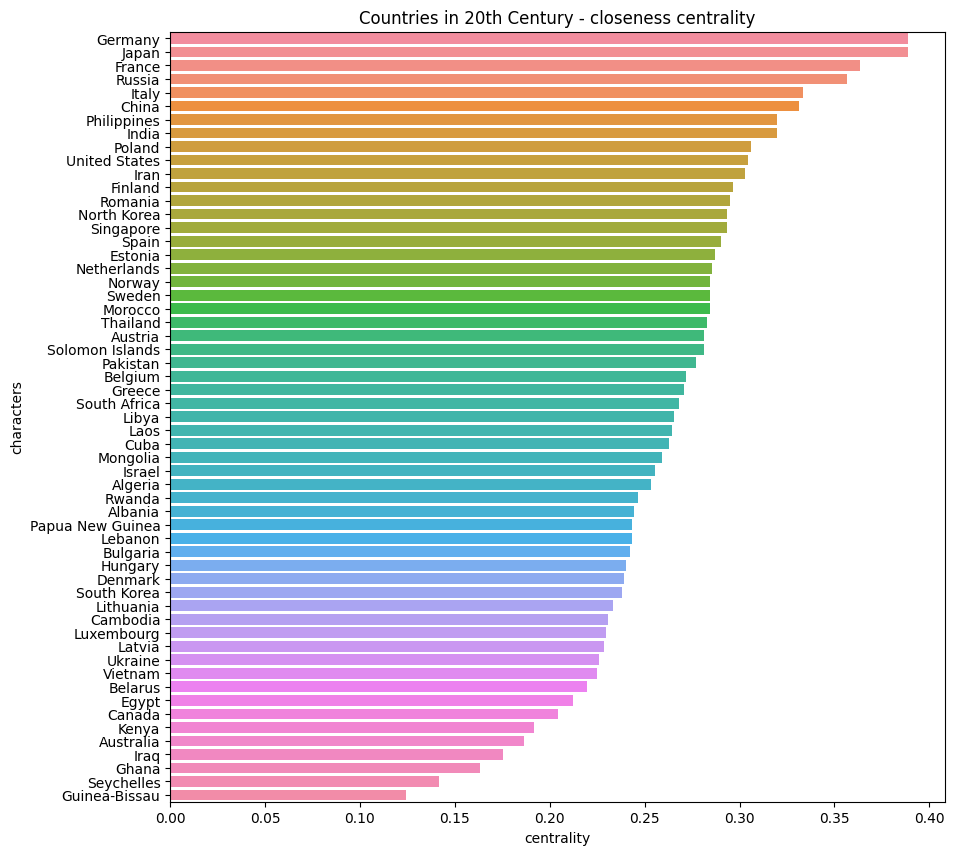

In [27]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Countries in 20th Century - closeness centrality")

The results look similar to the degree of centrality output regarding the order of importance. However, Many countries rank highly on the closeness scale. 

#### Betweenness centrality

In [28]:
betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [29]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

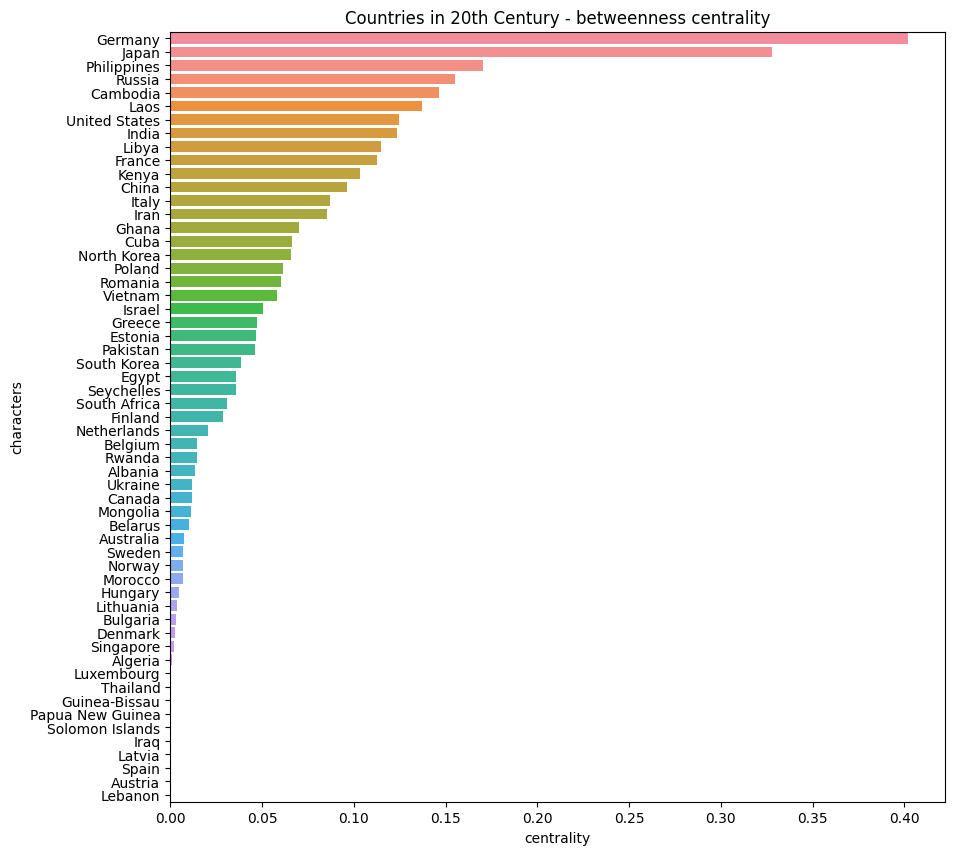

In [31]:
plt.figure(figsize = (10, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Countries in 20th Century - betweenness centrality")

The betweenness measure output reconfirms what the closeness centrality score established—specifically, that the most ”influential” ountry is Germany, followed by Japan. All the other countries score relatively low on this scale.

In [32]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')